#### Imports
---

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report



# Desabilitar warnings
import warnings
warnings.filterwarnings("ignore")

#### Dados
---

In [151]:
df = pd.read_csv('data/healthcare_dataset.csv')

In [152]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


Renomeando as colunas

In [153]:
df.rename(columns = {'Name' : 'nome', 'Age' : 'idade', 'Gender' : 'genero', 'Doctor' : 'doutor',
                     'Hospital' : 'hospital', 'Room Number' : 'numero_sala', 'Blood Type' : 'tipo_sangue',
                     'Medical Condition' : 'condicao_medica', 'Date of Admission' : 'data_admissao',
                     'Insurance Provider' : 'provedora_seguro', 'Billing Amount' : 'valor_cobranca',
                     'Admission Type' : 'tipo_admissao', 'Discharge Date' : 'data_alta', 'Medication' : 'medicacao',
                     'Test Results' : 'resultado_exame'}, inplace = True)

In [154]:
df.drop(columns=['nome', 'doutor', 'hospital', 'numero_sala', 'data_admissao', 'data_alta'], axis = 1, inplace = True)

#### Informações sobre os dados
---

In [155]:
df.head()

,idade,genero,tipo_sangue,condicao_medica,provedora_seguro,valor_cobranca,tipo_admissao,medicacao,resultado_exame
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             10000 non-null  int64  
 1   genero            10000 non-null  object 
 2   tipo_sangue       10000 non-null  object 
 3   condicao_medica   10000 non-null  object 
 4   provedora_seguro  10000 non-null  object 
 5   valor_cobranca    10000 non-null  float64
 6   tipo_admissao     10000 non-null  object 
 7   medicacao         10000 non-null  object 
 8   resultado_exame   10000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 703.3+ KB


In [157]:
df.describe()

,idade,valor_cobranca
count,10000.000000,10000.000000
mean,51.452200,25516.806778
std,19.588974,14067.292709
min,18.000000,1000.180837
25%,35.000000,13506.523967
50%,52.000000,25258.112566
75%,68.000000,37733.913727
max,85.000000,49995.902283


---

## Visualizações

#### Distribuição geral de todas as colunas
isso pode ajudar a identificar quais valores mais comuns entre os pacientes.

<Figure size 640x480 with 0 Axes>

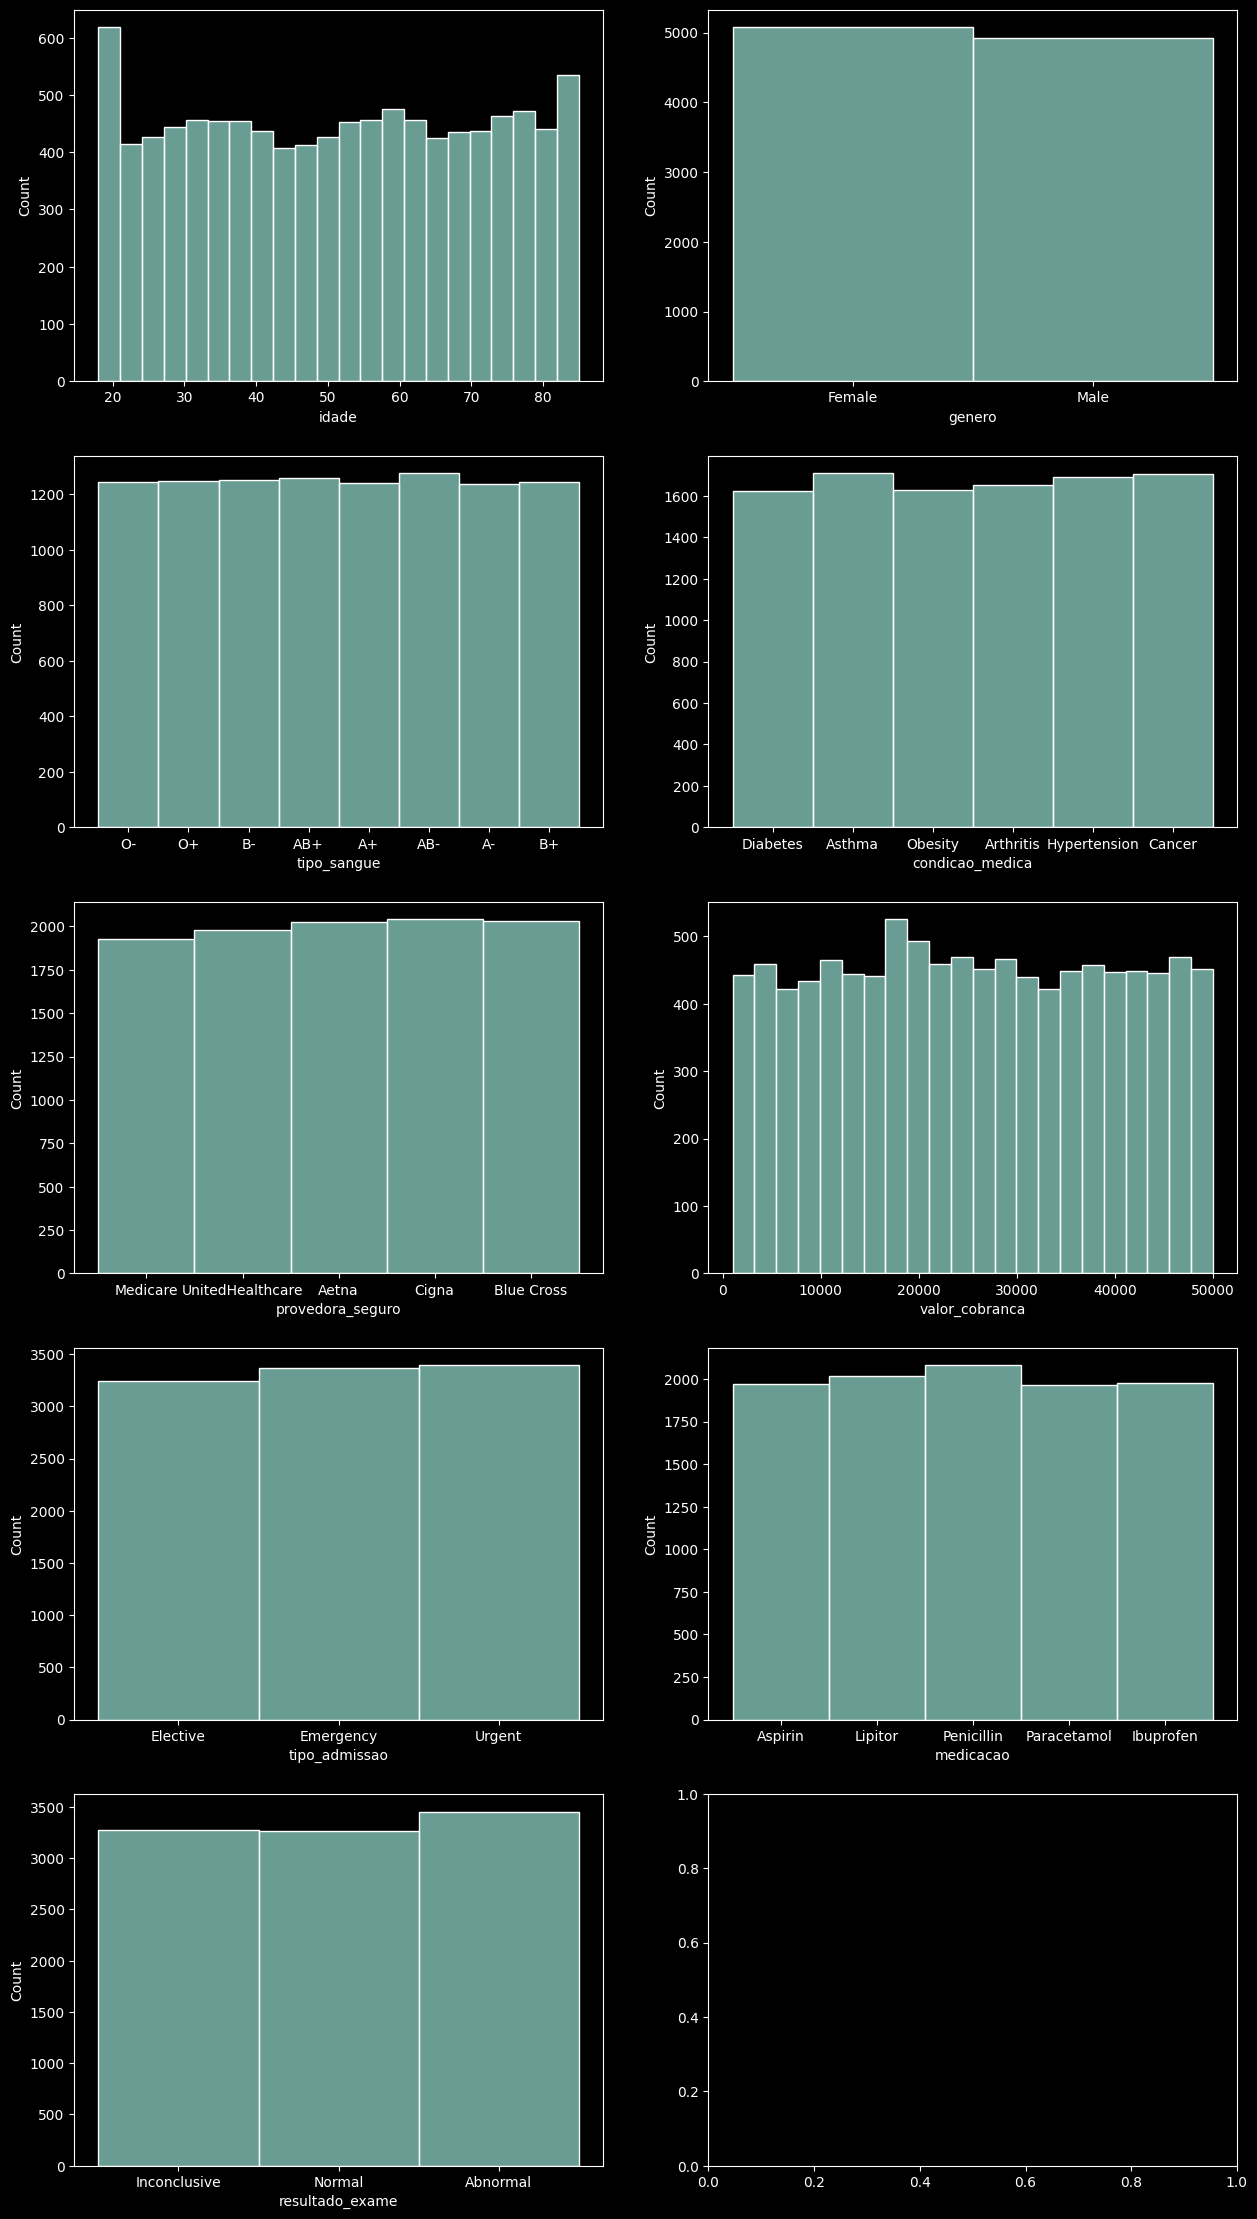

In [158]:
# fundo preto
plt.style.use('dark_background')

# Ajustar espaçamento vertical dos subplots
plt.subplots_adjust(hspace=0.5)

# Criar figura e eixos
fig, axs = plt.subplots(5, 2, figsize=(15, 28))
i = 0
# Loop pelas colunas do DataFrame
for coluna in df.columns:
    # Criar o histograma pra cada coluna
    sns.histplot(data = df, x = coluna, ax = axs[i//2, i%2], palette = 'cool')
    i += 1

# Exibir o plot
plt.show()


#### Distribuição de idade por genero
Isso pode revelar padrões de distribuição etária entre os diferentes gêneros.

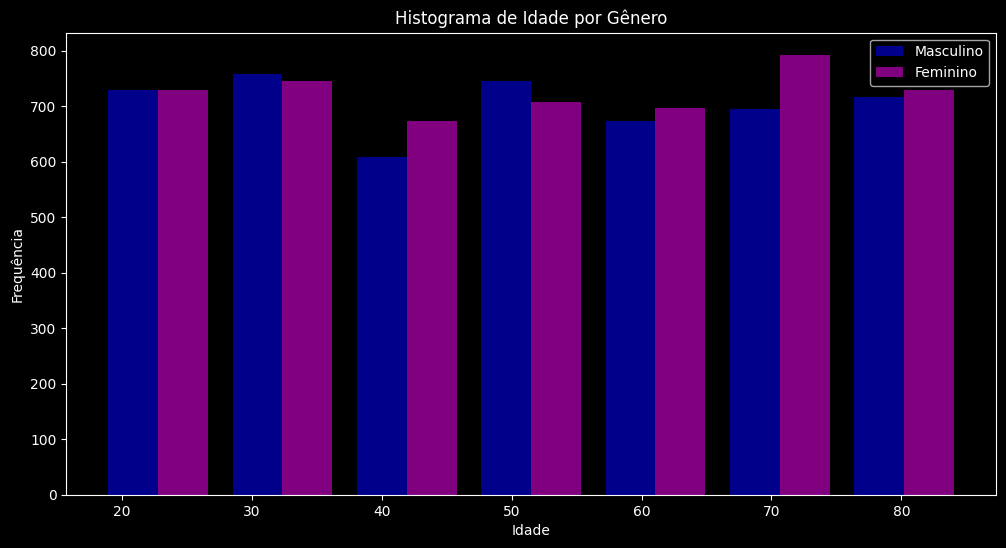

In [159]:
# Dividir idades por gênero
idade_masc = [df['idade'][i] for i in range(len(df['idade'])) if df['genero'][i] == 'Male']
idade_fem = [df['idade'][i] for i in range(len(df['idade'])) if df['genero'][i] == 'Female']

# Criar histograma
plt.style.use('dark_background')
plt.figure(figsize = (12, 6))
plt.hist([idade_masc, idade_fem], bins = 7, color = ['darkblue', 'purple'], label = ['Masculino', 'Feminino'])

# Adicionar rótulos e título
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade por Gênero')
plt.legend()

# Exibi
plt.show()

#### Boxplot do valor da cobrança X Provedora
Isso pode ajudar a identificar discrepancias (outliers)

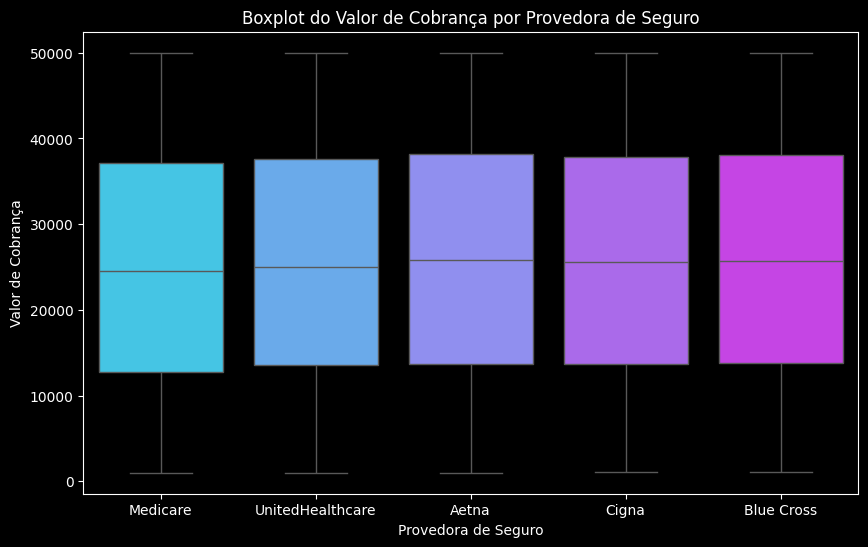

In [160]:
# Criar o boxplot
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = 'provedora_seguro', y = 'valor_cobranca', palette = 'cool')

# Adicionar título e rótulos
plt.title('Boxplot do Valor de Cobrança por Provedora de Seguro')
plt.xlabel('Provedora de Seguro')
plt.ylabel('Valor de Cobrança')

# Exibir o plot
plt.show()

#### Gráfico de dispersão da idade por valor de cobrança
Isso pode identificar padrões na cobrança

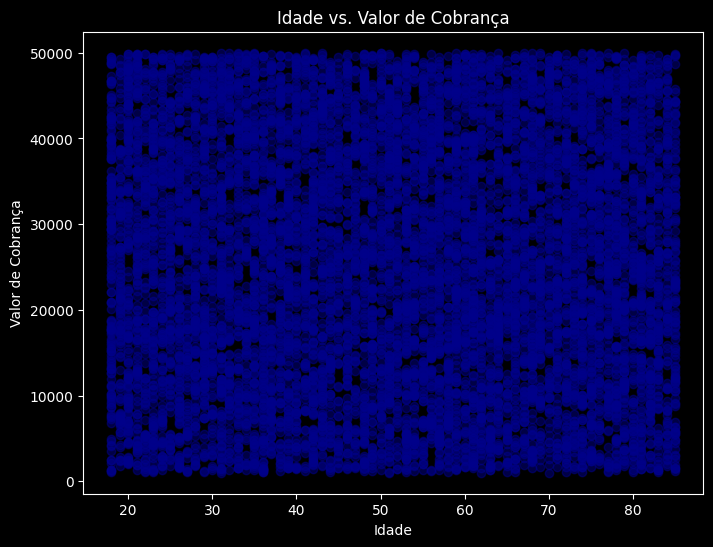

In [249]:
# Definir estilo com fundo preto
plt.style.use('dark_background')

# Gráfico de Dispersão para Idade vs. Valor de Cobrança
plt.figure(figsize = (8, 6))
plt.scatter(df['idade'], df['valor_cobranca'], alpha = 0.5, color = 'darkblue')
plt.title('Idade vs. Valor de Cobrança')
plt.xlabel('Idade')
plt.ylabel('Valor de Cobrança')
plt.show()


---

#### Eu poderia continuar procurando visualizações para melhor análise, mas como são apenas dados fictícios e eles estão muito bem distribuídos, não acho necessário. Então, partirei para o machine learning.

----

#### Correlação das variaveis

A correlação a identificar padrões e pode guiar a seleção de variáveis em modelos preditivos.


<Axes: >

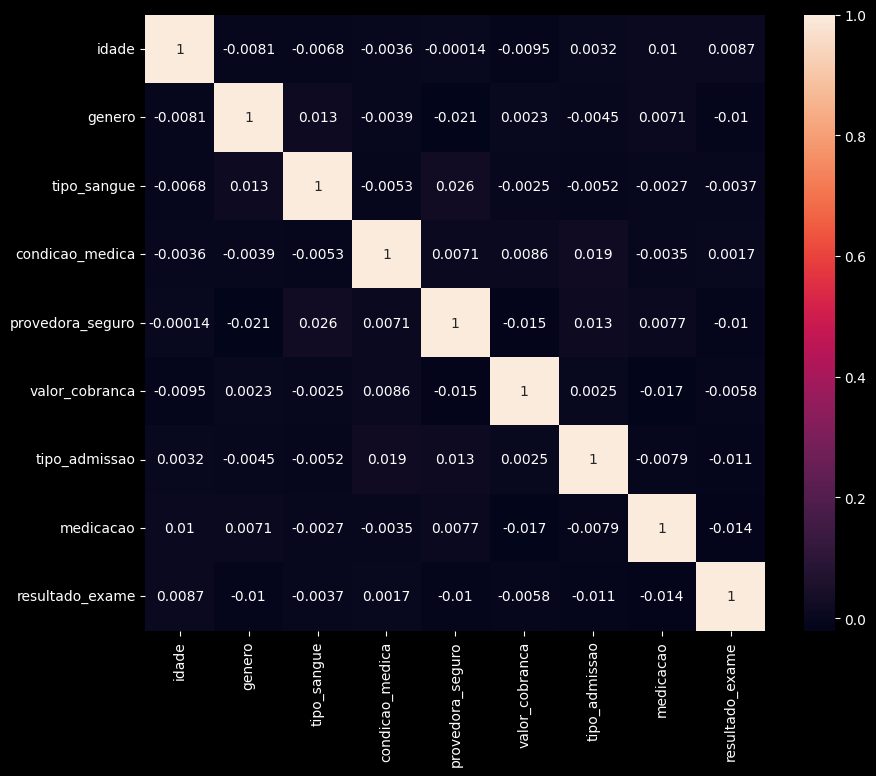

In [209]:
# grafico para analisar a correlação das variaveis
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)

#### Transformando variaveis categoricas de textos em numeros

Isso facilita a computação, melhora a interpretação e reduz o espaço de armazenamento necessário

In [210]:
# colunas categoricas
cat_cols = df.select_dtypes(include = ['object']).columns

# encode valores
le = LabelEncoder()
for col in cat_cols: 
    le.fit(df[col])
    df[col] = le.transform(df[col])

#### Separando treino e teste, padronizando, treinando e prevendo

In [232]:
# Treino e teste
X = df.drop('resultado_exame', axis = 1)
y = df['resultado_exame']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Padronizar os dados (importante para o KNN)
scaler = StandardScaler()
xtrain_padronizado = scaler.fit_transform(xtrain)
xtest_padronizado = scaler.transform(xtest)

# Inicializar o classificador KNN
k = 3  # Numero de vizinhos
knn = KNeighborsClassifier(n_neighbors = k)

# Treinar o modelo
knn.fit(xtrain_padronizado, ytrain)

# Fazer previsões
ypred = knn.predict(xtest_padronizado)


#### Resultados do modelo

In [245]:
class_names = ['Normal', 'Abnormal', 'Inconclusive']
print('Relatório de Classificação\n')
print(classification_report(ytest, ypred, target_names=class_names))


Relatório de Classificação

              precision    recall  f1-score   support

      Normal       0.36      0.51      0.42       691
    Abnormal       0.37      0.28      0.32       649
Inconclusive       0.37      0.30      0.33       660

    accuracy                           0.36      2000
   macro avg       0.36      0.36      0.36      2000
weighted avg       0.36      0.36      0.36      2000



---

#### Analisando os resultados, pode nao parecer um resultado interessante, mas analisando a correlação dos dados, vemos que são muito pouco relacionados a variavel prevista.

---